In [142]:
# importing importanat libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
warnings.filterwarnings('ignore')

In [78]:
# importing dataset

data = pd.read_csv('diabetes.csv')

In [79]:
# reading top rows of the dataset

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
# checking number of rows and columns(shape) of dataset

data.shape

(768, 9)

In [81]:
# checking summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
# describe summary of dataset

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
# checking NaN value of dataset

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

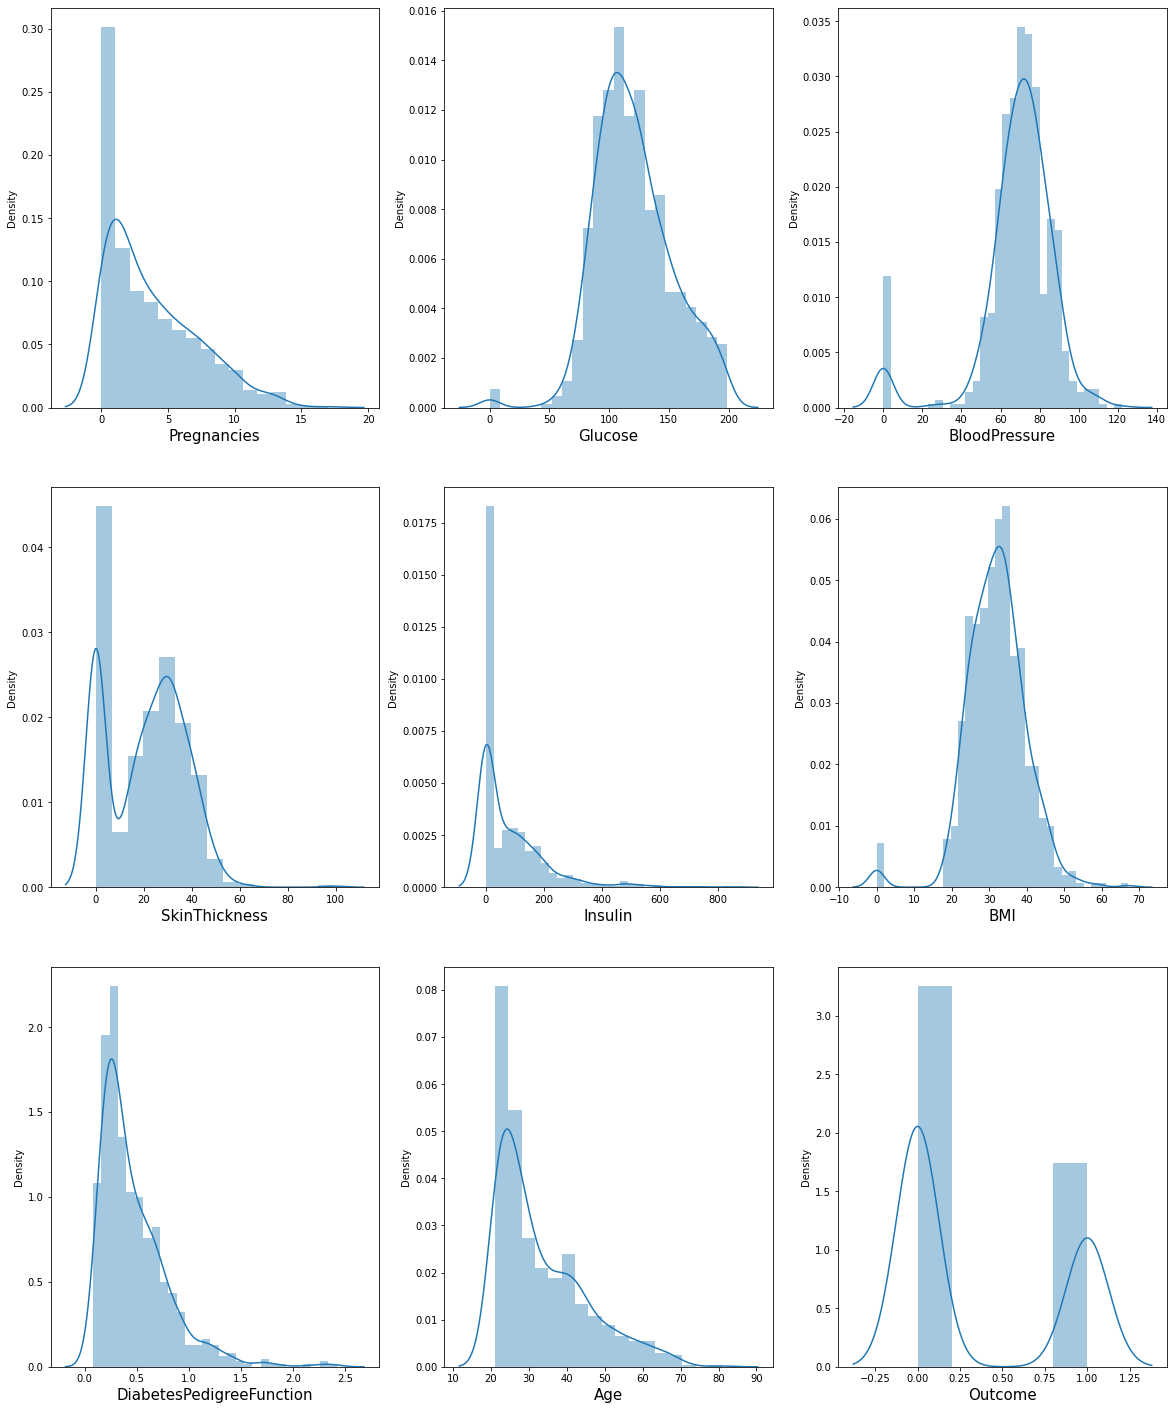

In [84]:
# checking distribution of dataset

plt.figure(figsize = (20,25),facecolor='white')
plotnumber = 1

for columns in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize = 15)
    plotnumber +=1
plt.show()

In [85]:
# imputing all 0's with mean value

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['Age'] = data['Age'].replace(0,data['Age'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

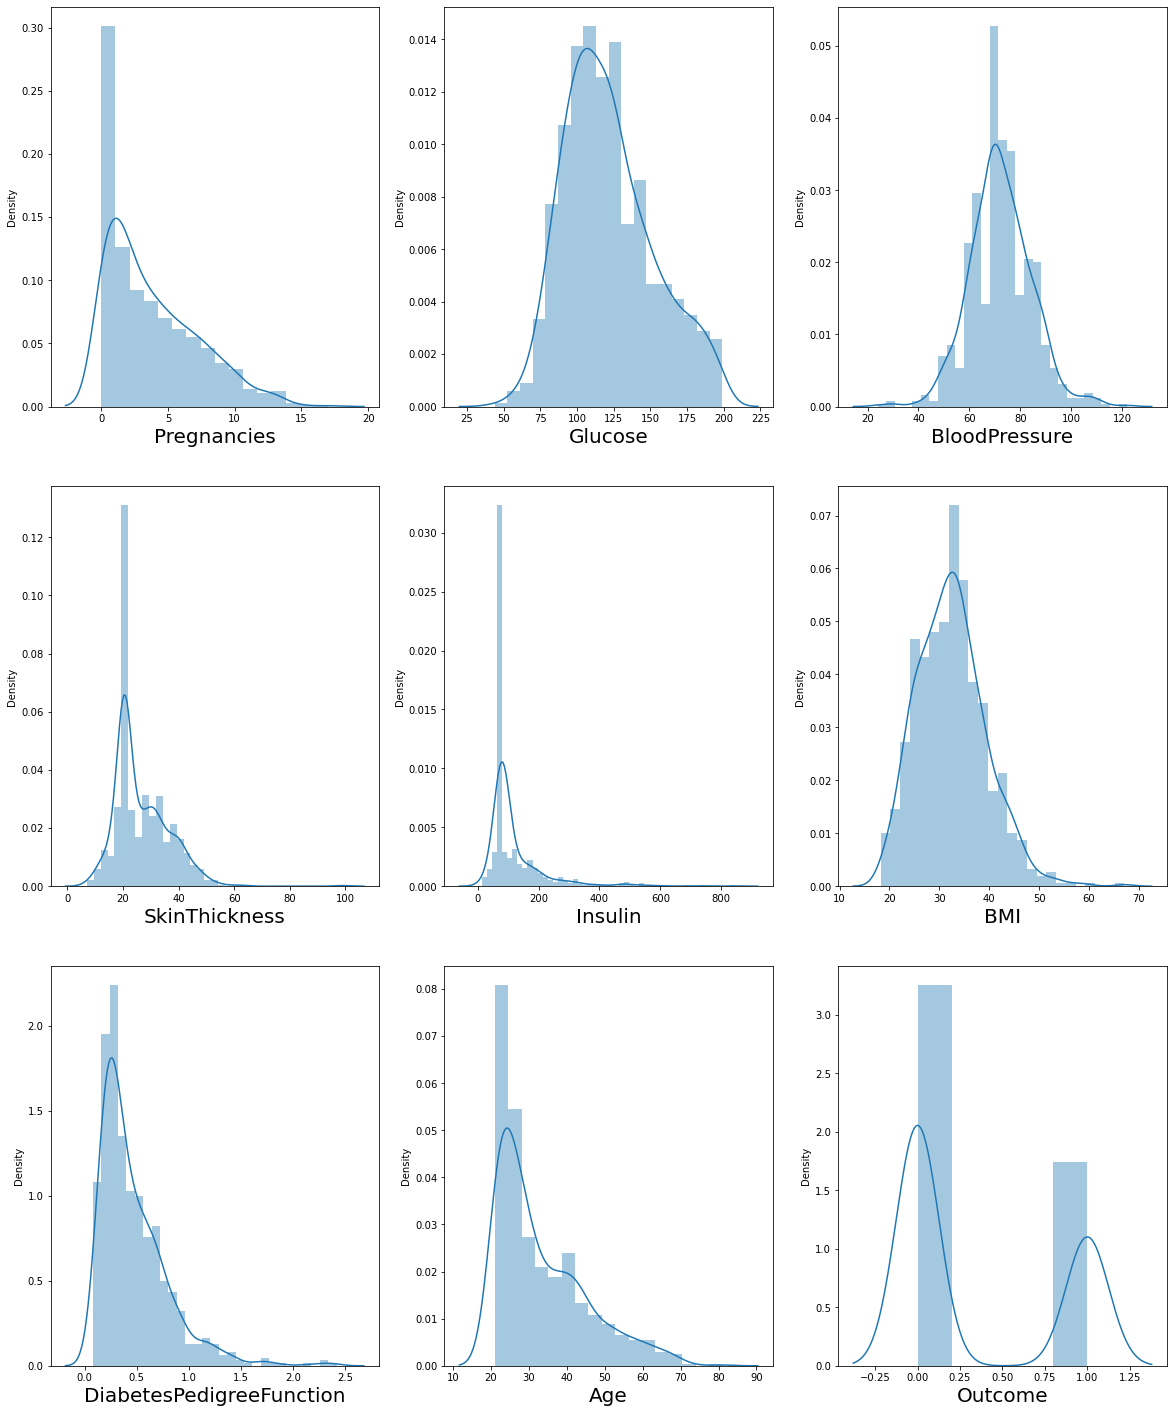

In [86]:
# rechecking distribution after imputing 0's

plt.figure(figsize = (20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

<AxesSubplot:>

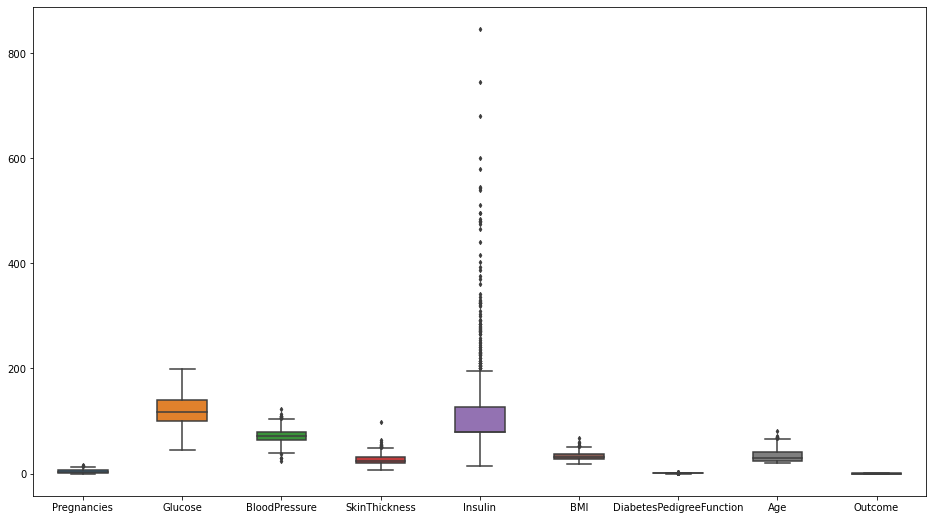

In [87]:
# handling outliers

fig,ax = plt.subplots(figsize = (16,9))
sns.boxplot(data = data,ax = ax ,fliersize= 3,width=0.5)

In [89]:
# imputing outliers

q = data['Pregnancies'].quantile(0.98)
data_upd = data[data['Pregnancies']<q]

q = data_upd['Glucose'].quantile(0.99)
data_upd = data_upd[data_upd['Glucose']<q]

q = data_upd['BloodPressure'].quantile(0.98)
data_upd = data_upd[data_upd['BloodPressure']<q]

q = data_upd['SkinThickness'].quantile(0.99)
data_upd = data_upd[data_upd['SkinThickness']<q]

q = data_upd['Insulin'].quantile(0.99)
data_upd = data_upd[data_upd['Insulin']<q]

q = data_upd['BMI'].quantile(0.99)
data_upd = data_upd[data_upd['BMI']<q]

q = data_upd['Age'].quantile(0.99)
data_upd = data_upd[data_upd['Age']<q]

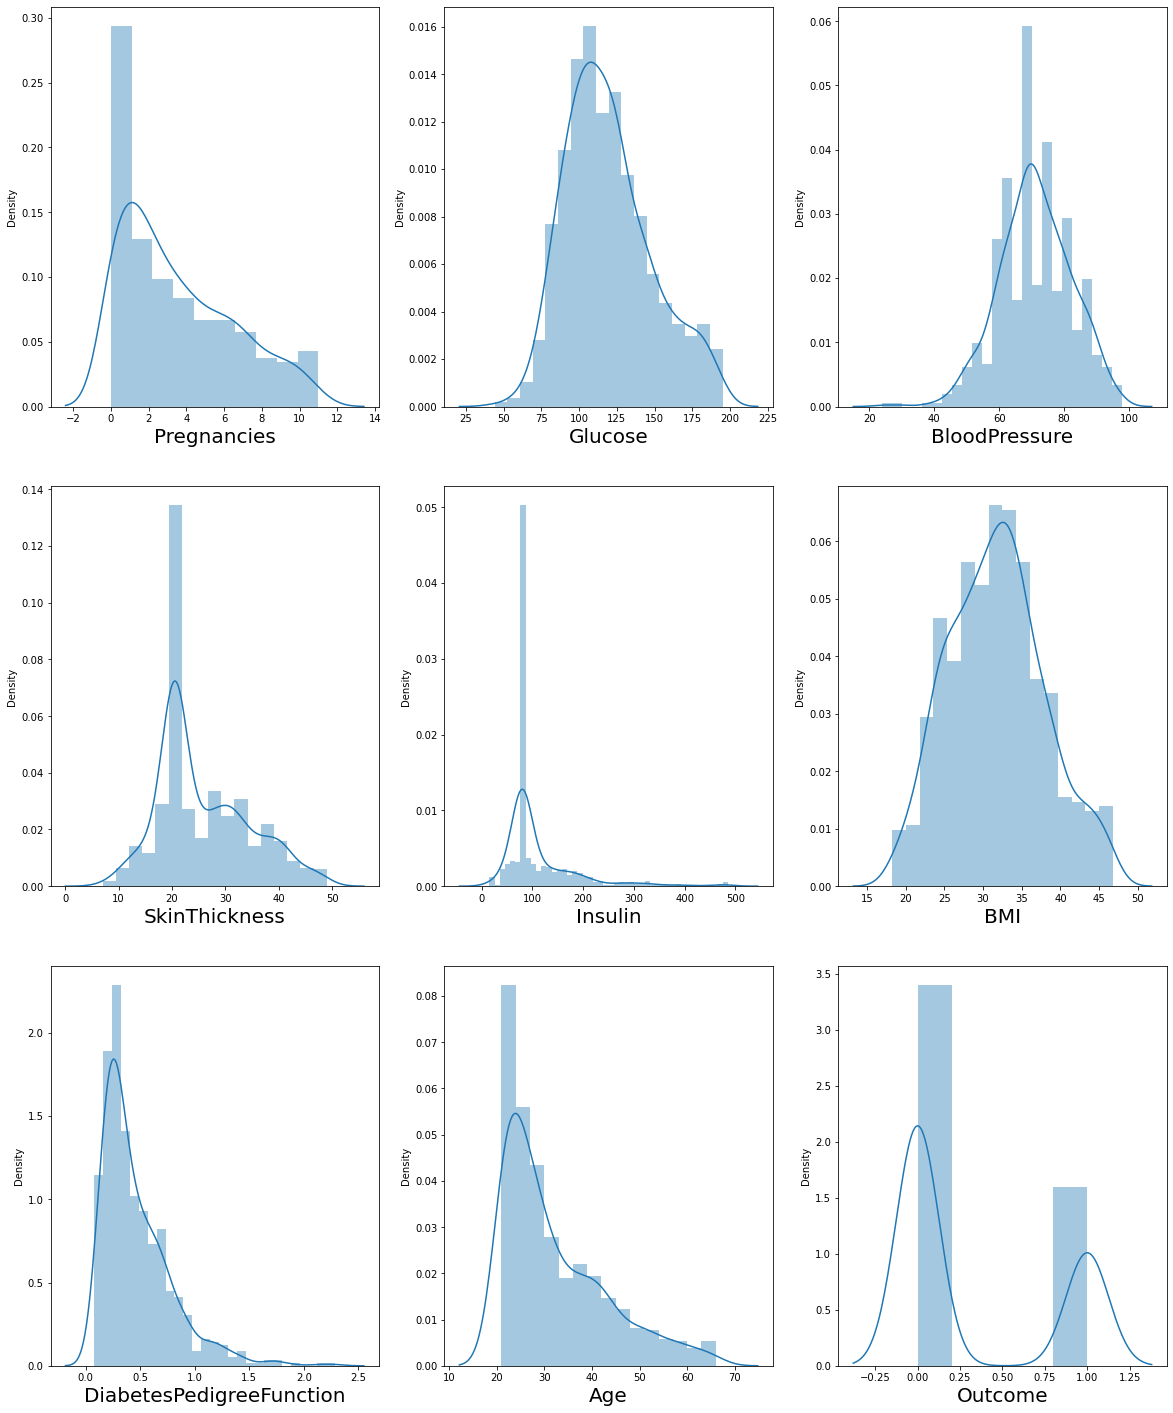

In [93]:
# rechecking distribution after handling outliers.

plt.figure(figsize = (20,25))
plotnumber = 1

for column in data_upd:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_upd[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [107]:
# preparing x and y

X = data_upd.drop(columns= ['Outcome'],axis=1)
y = data_upd['Outcome']

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [112]:
# performing standard scalar to bring all data at same scale

scalar = StandardScaler()
X_scal = scalar.fit_transform(X)

In [119]:
# now checking Multicollinearity using vif

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scal,i) for i in range(X_scal.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.451014,Pregnancies
1,1.335420,Glucose
2,1.213783,BloodPressure
3,1.484969,SkinThickness
4,1.296848,Insulin
5,1.512357,BMI
6,1.050673,DiabetesPedigreeFunction
7,1.643084,Age


In [124]:
# creating training and test dataset
x_train,x_test,y_train,y_test = train_test_split(X_scal,y,test_size = 0.25,random_state=123)

In [127]:
# training our model

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [130]:
# predicting result

y_pred = log_reg.predict(x_test)

In [134]:
# checking accuracy

acc = accuracy_score(y_test,y_pred)
acc

0.8011695906432749

In [137]:
# calculating confusion matrix

con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[100,  11],
       [ 23,  37]])

In [141]:
# calculating AUC

auc = roc_auc_score(y_test,y_pred)
auc

0.7587837837837839

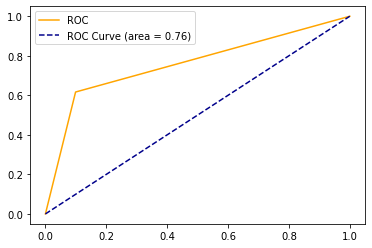

In [153]:
# ROC curve graph

fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color = 'orange',label = 'ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle = '--',label = 'ROC Curve (area = %0.2f)'%auc)
plt.legend()